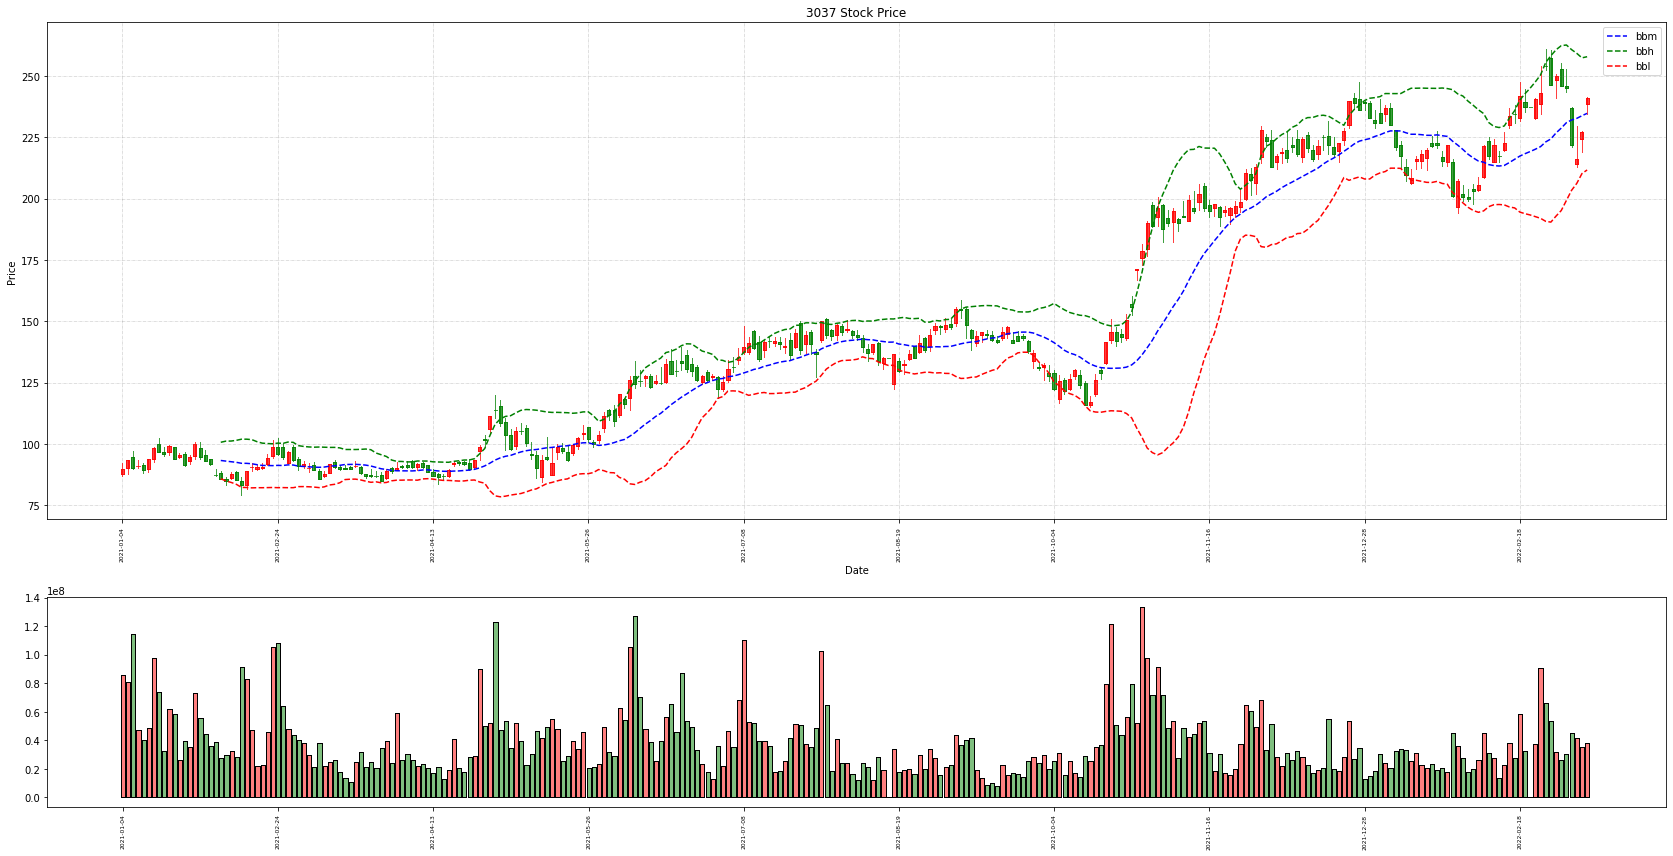

In [33]:
#先將可能會用到的套件import起來
import ta
import yfinance as yf
import pandas as pd
import mpl_finance as mpf
import matplotlib.pyplot as plt

# 股價代號
stock_id = '3037'

#yfinance產出 stock_id 股價資料
stock = yf.Ticker(f'{stock_id}.TW')
#獲取20170101-20210202
df = stock.history(start="2021-01-01",end="2022-03-11")
#呼叫布林通道
indicator_bb = ta.volatility.BollingerBands(close=df["Close"], window=20, window_dev=2)
#布林中線
df['bbm'] = indicator_bb.bollinger_mavg()
#布林上線
df['bbh'] = indicator_bb.bollinger_hband()
#布林下線
df['bbl'] = indicator_bb.bollinger_lband()
#創建畫布視窗，其中figsize代表你要的畫布大小，你也可以不設，不設就基礎的小小一張
fig = plt.figure(figsize=(24, 12))
#定義出模板大小，3*20
grid = plt.GridSpec(3,20)
#區塊一畫主圖，所以我們給他兩個空間
ax = fig.add_subplot(grid[0:2,1:])
#區塊二畫子圖，所以我們給他一個空間
ax2 = fig.add_subplot(grid[2:,1:])
#使用mpl_finance的candlestick2_ochl函數，傳入剛剛的畫布加上OCHL值
mpf.candlestick2_ochl(ax, df['Open'], df['Close'], df['High'],
      df['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
#使用mpl.volume_overlay畫出量
mpf.volume_overlay(ax2, df['Open'], df['Close'], df['Volume'], colorup='r', colordown='g', width=0.8, alpha=0.5)

#將以30為間隔的df以apply+小函數lambda轉換日期
convert_date = pd.DataFrame(df.index[::30])['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
#設置你要的刻度
ax.set_xticks(range(0,len(df.index),30))
#設置這幾個刻度的值
ax.set_xticklabels(convert_date ,rotation=90,fontsize=6)
#在ax區塊上畫上布林上中下線
ax.plot(df['bbm'].values,  color='b', label = 'bbm', linestyle="--")
ax.plot(df['bbh'].values,  color='g', label = 'bbh', linestyle="--")
ax.plot(df['bbl'].values,  color='r', label = 'bbl', linestyle="--")

# Add x, y gridlines 網格
ax.grid(visible=True, color='grey', 
        linestyle='-.', linewidth=0.5, 
        alpha=0.5) 

#設置你要的刻度
ax2.set_xticks(range(0,len(df.index),30))
#設置這幾個刻度的值
ax2.set_xticklabels(convert_date ,rotation=90,fontsize=6)
#設置圖片標題
ax.set_title(f'{stock_id} Stock Price')
#設置x軸名稱為Date
ax.set_xlabel('Date')
#設置y軸名稱為Price
ax.set_ylabel("Price")
#防止重疊
fig.tight_layout()
#設置legend才會有label跑出來
ax.legend()
#儲存圖片檔為png
plt.savefig('test.png')   
plt.show()